#  DIGITAL IMAGE PROCESSING 


**ROLL    : 21I-2535**



**SECTION : B**


# Question 01

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from numpy.fft import fft2, ifft2


In [11]:
def convert_to_RGB(img):
    a = np.empty_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            a[i][j][0],a[i][j][1],a[i][j][2] = img[i][j][2],img[i][j][1],img[i][j][0]

    return a

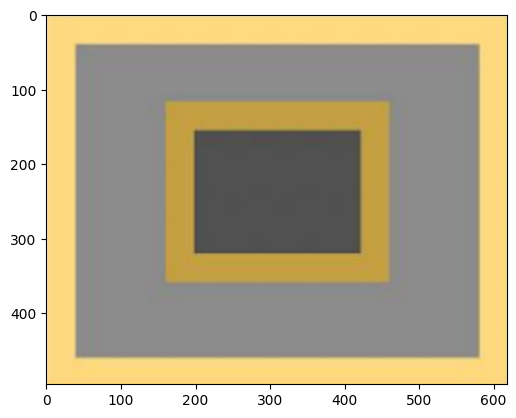

In [8]:
img = cv2.imread('/kaggle/input/dip-assignement-dataset/q1.png') 
img = np.asarray(img)
img = convert_to_RGB(img)
plt.imshow(img)

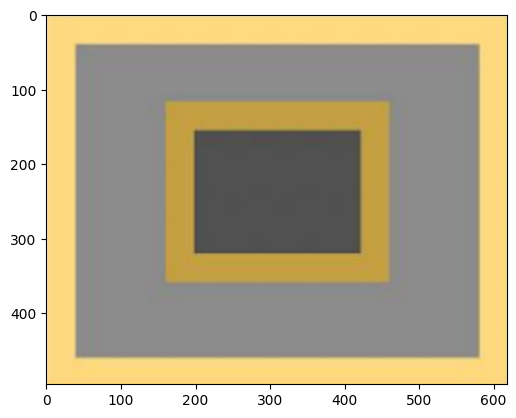

In [12]:
output = np.ones((img.shape[0],img.shape[1],4),dtype=int)
output[:,:,:3] = img
output[:, :, 3] = int(1 * 255)
plt.imshow(output)

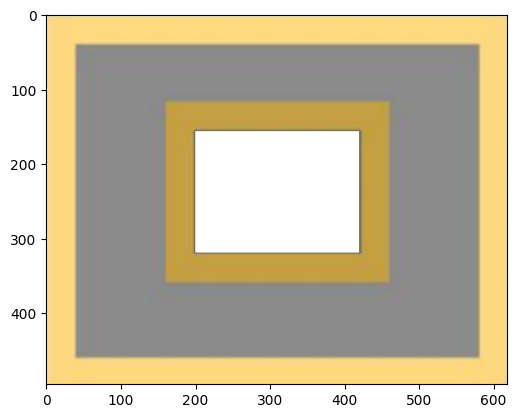

In [13]:
output[157:320 ,200:420]= int(0 * 255)

plt.imshow(output)

In [14]:
cv2.imwrite('q1_transparent.png', img)

True

## Question 2

In [15]:
def color_change(img):
    a = np.empty((img.shape[0],img.shape[1]),dtype=np.uint8)
    if img.shape[2] == 1:
        print("This image is Already In GrayScale Format.")
        return
    else:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                    a[i][j] = int(0.299 * img[i][j][0]  + 0.587 * img[i][j][1] + 0.11 * img[i][j][2])
        plt.imshow(a,cmap='gray')
        cv2.imwrite("colored-to-grayscale.png",a)
        return a


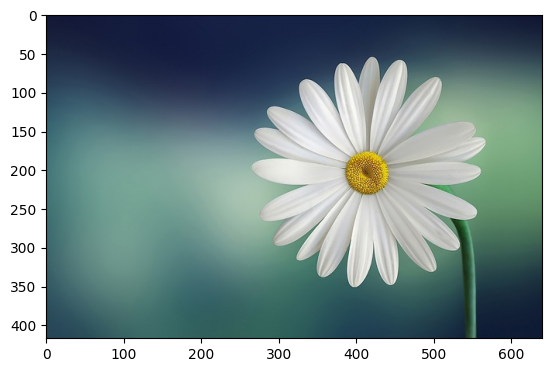

In [16]:
img = cv2.imread('/kaggle/input/question-2/q2.jpg') 
img = convert_to_RGB(img)
plt.imshow(img)

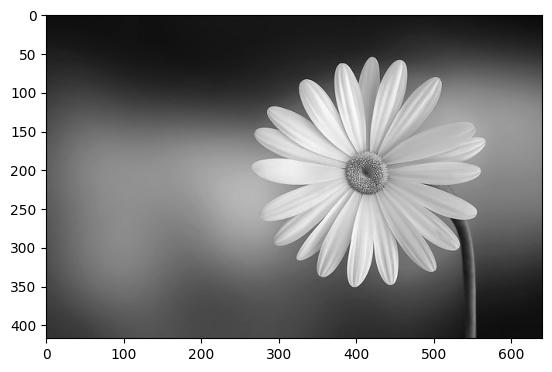

In [17]:
new_arr = np.asarray(img)
b = color_change(new_arr)

## Question 3

In [18]:
def concatenate(img1, img2):
    if img1.shape != img2.shape:
        print("The Dimensions are not same so the concatenations won't occur")
    else:
        a = np.concatenate((img1,img2),axis =1)
        plt.imshow(a)
        return a
        

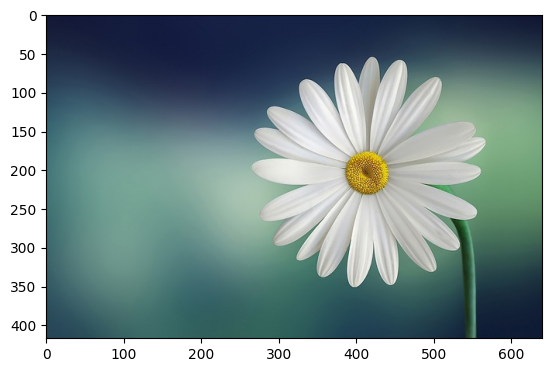

In [19]:
img = cv2.imread('/kaggle/input/question-2/q2.jpg') 
img = convert_to_RGB(img)
plt.imshow(img)

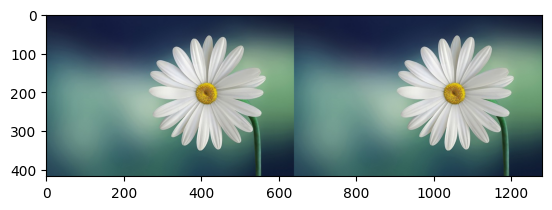

In [20]:
new_arr = np.asarray(img)
a = concatenate(new_arr,new_arr)

## Question 4

In [30]:
def flip_image(img, flag):
    if flag == 0:
        a = np.empty_like(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                a[i][j] = img[img.shape[0] - i - 1][img.shape[1] - j - 1]
    elif flag == 1:
        a = np.empty((img.shape[1],img.shape[0],img.shape[2]),dtype=int)
        for i in range(img.shape[1]):
            for j in range(img.shape[0]):
                a[i][j] = img[j][i]

    plt.imshow(a)
    return a


In [31]:
img = cv2.imread('/kaggle/input/question-2/q2.jpg') 
img = convert_to_RGB(img)

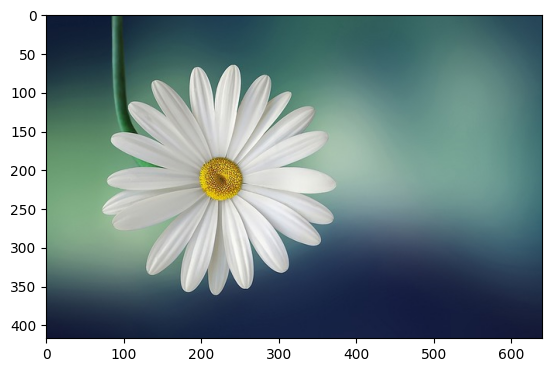

In [32]:
new_arr = np.asarray(img)
a = flip_image(new_arr,0)

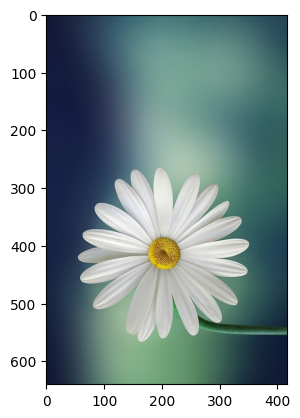

In [33]:
a = flip_image(new_arr,1)

## Question 5

In [ ]:
def common_image(img1,img2):
    a = np.zeros((img1.shape),dtype=int)
    common = np.logical_and(img1,img2)
    a[common] = 255
    plt.imshow(a,cmap='gray')
    return a

In [ ]:
def sharpe_image(img):
    psf = np.array([[0.01, 0.1, 0.01],
                [0.01, 0.1, 0.01],
                [0.01, 0.1, 0.01]])  # Example PSF (you may need to adjust)
    # Signal-to-noise ratio (SNR)
    snr = 1  # Adjust this parameter based on the noise level
    # Fourier transform of the image and the PSF
    F_img = fft2(img)
    F_psf = fft2(psf, s=img.shape)

    # Wiener deconvolution
    H = np.conj(F_psf) / (np.abs(F_psf)**2 + snr)
    deblurred_img = np.real(ifft2(F_img * H))

    # Clip negative values and rescale to 0-255 range
    deblurred_img = np.clip(deblurred_img, 0, 255).astype(np.uint8)

    return deblurred_img

In [ ]:
img1 = cv2.imread("/kaggle/input/question-5/q5(a).png")
img2 = cv2.imread("/kaggle/input/question-5/q5(b).png")
plt.imshow(img1)

In [ ]:
plt.imshow(img2)

In [ ]:
img1 = np.asarray(img1)
img2 = np.asarray(img2)

In [ ]:
img1 = img1[:,:523]
print(img1.shape)
img2.shape

In [ ]:
img1 = color_change(img1)
img2 = color_change(img2)

In [ ]:
img1 = sharpe_image(img1)
plt.imshow(img1,cmap='gray')

In [ ]:
img2 = sharpe_image(img2)
plt.imshow(img2,cmap='gray')

In [ ]:
b = common_image(img1,img2)